In [2]:
path='c:\\pytest\\data\\kor-eng\\'

In [15]:
import pandas as pd
data=pd.read_csv(path+'kor-eng.txt',names=['source','target'],sep='\t',encoding='utf-8').iloc[:1000,:]
print('data length:',len(data))
print('data type:',type(data))
print('data shape:',data.shape)
print('data sample:\n',data.sample(5))

data length: 1000
data type: <class 'pandas.core.frame.DataFrame'>
data shape: (1000, 2)
data sample:
                            source  \
566            작년 9월 김포로 수련회를 갔어.   
74   필리핀 사업을 시작하기 위해 준비가 다 되어 가요.   
182         저는 대개 사무실에 여덟시 반에 가요.   
433           어제는 사진을 찍으러 시장에 갔어.   
545          그리고 그 부부는 오른쪽 길로 갔어.   

                                                target  
566     We went to Kimpo for a retreat last September.  
74   I'm almost done preparing for a business in th...  
182        I usually go to the office at eight thirty.  
433   I went to the market to take pictures yesterday.  
545              And the couple went for a right path.  


In [16]:
data.target_input=data.target.apply(lambda x:'\t'+x+'\n')
data.target_target=data.target.apply(lambda x:x+'\n')
print("\ndata.target_input:\n",data.target_input)
print("\ndata.target_target:\n",data.target_target)



data.target_input:
 0       \tI go to the attic every evening to meet Bat.\n
1        \tSir, I don't understand this sentence here.\n
2      \tTime flies when you start using the computer.\n
3         \tI'm going back to Korea today at midnight.\n
4             \tI go to bathroom as soon as I wake up.\n
                             ...                        
995        \tIf you were mine, I will be really happy.\n
996    \tWe have lots in common because we are studen...
997    \tI cannot open it because I have no authority...
998           \tI think we are alike in personalities.\n
999    \tAnd if we have something to talk about, let'...
Name: target, Length: 1000, dtype: object

data.target_target:
 0         I go to the attic every evening to meet Bat.\n
1          Sir, I don't understand this sentence here.\n
2        Time flies when you start using the computer.\n
3           I'm going back to Korea today at midnight.\n
4               I go to bathroom as soon as I wake up.\n
   

c:\projects\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
c:\projects\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [17]:
max_src_len=data.source.apply(lambda x: len(x)).max()
print('source sentence max length: ', max_src_len)

max_tar_len=data.target_input.apply(lambda x: len(x)).max()
print('source sentence max length: ', max_tar_len)

source sentence max length:  37
source sentence max length:  64


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer_source=Tokenizer(num_words=None,char_level=True,lower=False) #num words->None = open
tokenizer_source.fit_on_texts(data.source)
word_index_source=tokenizer_source.word_index
print(len(word_index_source))
# print(word_index_source)

708


In [19]:
tokenizer_target=Tokenizer(num_words=None,char_level=True,lower=False) #num words->None = open
tokenizer_target.fit_on_texts(data.target_input)
word_index_target=tokenizer_target.word_index
print(len(word_index_target))
# print(word_index_target)

60


In [20]:
encoder_input=tokenizer_source.texts_to_sequences(data.source)
print(data.source[0], encoder_input[0])
print(data.source[1], encoder_input[1])
print(data.source[2], encoder_input[2])
print(data.source[3], encoder_input[3])

나는 매일 저녁 배트를 만나러 다락방으로 가요. [14, 5, 1, 198, 15, 1, 102, 179, 1, 161, 106, 25, 1, 47, 14, 30, 1, 27, 318, 131, 26, 21, 1, 6, 11, 2]
선생님 이문장이 이해가 안 가요. [170, 56, 183, 1, 9, 113, 57, 9, 1, 9, 28, 6, 1, 107, 1, 6, 11, 2]
컴퓨터를 시작하면 시간이 너무 빠르게 가요. [544, 545, 139, 25, 1, 39, 210, 17, 45, 1, 39, 99, 9, 1, 74, 86, 1, 162, 199, 52, 1, 6, 11, 2]
나는 오늘 자정에 한국으로 돌아 가요. [14, 5, 1, 34, 60, 1, 42, 70, 4, 1, 24, 66, 26, 21, 1, 128, 3, 1, 6, 11, 2]


In [21]:
decoder_input=tokenizer_target.texts_to_sequences(data.target_input)
decoder_target=tokenizer_target.texts_to_sequences(data.target_target)

print(data.target_input[0], decoder_input[0])
print(data.target_input[1], decoder_input[1])
print(data.target_input[2], decoder_input[2])

print(data.target_target[0], decoder_target[0])
print(data.target_target[1], decoder_target[1])
print(data.target_target[2], decoder_target[2])

	I go to the attic every evening to meet Bat.
 [15, 22, 1, 18, 4, 1, 3, 4, 1, 3, 10, 2, 1, 5, 3, 3, 7, 21, 1, 2, 27, 2, 9, 19, 1, 2, 27, 2, 6, 7, 6, 18, 1, 3, 4, 1, 13, 2, 2, 3, 1, 44, 5, 3, 20, 16]
	Sir, I don't understand this sentence here.
 [15, 31, 7, 9, 29, 1, 22, 1, 12, 4, 6, 28, 3, 1, 14, 6, 12, 2, 9, 8, 3, 5, 6, 12, 1, 3, 10, 7, 8, 1, 8, 2, 6, 3, 2, 6, 21, 2, 1, 10, 2, 9, 2, 20, 16]
	Time flies when you start using the computer.
 [15, 30, 7, 13, 2, 1, 23, 11, 7, 2, 8, 1, 17, 10, 2, 6, 1, 19, 4, 14, 1, 8, 3, 5, 9, 3, 1, 14, 8, 7, 6, 18, 1, 3, 10, 2, 1, 21, 4, 13, 26, 14, 3, 2, 9, 20, 16]
I go to the attic every evening to meet Bat.
 [22, 1, 18, 4, 1, 3, 4, 1, 3, 10, 2, 1, 5, 3, 3, 7, 21, 1, 2, 27, 2, 9, 19, 1, 2, 27, 2, 6, 7, 6, 18, 1, 3, 4, 1, 13, 2, 2, 3, 1, 44, 5, 3, 20, 16]
Sir, I don't understand this sentence here.
 [31, 7, 9, 29, 1, 22, 1, 12, 4, 6, 28, 3, 1, 14, 6, 12, 2, 9, 8, 3, 5, 6, 12, 1, 3, 10, 7, 8, 1, 8, 2, 6, 3, 2, 6, 21, 2, 1, 10, 2, 9, 2, 20, 16]
Time flies w

In [22]:
print('data.sourcetype:', type(data.source))
print('encoder_inputtype:', type(encoder_input))
print('data.source:\n', data.source)
# print('encoder_input:\n', encoder_input)

data.sourcetype: <class 'pandas.core.series.Series'>
encoder_inputtype: <class 'list'>
data.source:
 0       나는 매일 저녁 배트를 만나러 다락방으로 가요.
1               선생님 이문장이 이해가 안 가요.
2         컴퓨터를 시작하면 시간이 너무 빠르게 가요.
3            나는 오늘 자정에 한국으로 돌아 가요.
4               나는 일어나자마자 화장실에 가요.
                  ...             
995        너가 내 것이라면 너무나 행복할 것 같아.
996       우리가 학생이라서 통하는 게 많은 것 같아.
997        나에게 권한이 없어서 안 열리는 것 같아.
998           그리고 성격이 나와 비슷한 것 같아.
999    그리고 할말이 있다면 문자로 하는게 좋을것 같아.
Name: source, Length: 1000, dtype: object


In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_input=pad_sequences(encoder_input,maxlen=max_src_len,padding='post')
decoder_input=pad_sequences(decoder_input,maxlen=max_tar_len,padding='post')
decoder_target=pad_sequences(decoder_target,maxlen=max_tar_len,padding='post')

print('\npadding result sample:\n',data.target_input[0],decoder_input[0])


padding result sample:
 	I go to the attic every evening to meet Bat.
 [15 22  1 18  4  1  3  4  1  3 10  2  1  5  3  3  7 21  1  2 27  2  9 19
  1  2 27  2  6  7  6 18  1  3  4  1 13  2  2  3  1 44  5  3 20 16  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [24]:
print('decoder_inputlength:', len(decoder_input))
print('decoder_inputtype:', type(decoder_input))
print('decoder_inputshape:', decoder_input.shape)

decoder_inputlength: 1000
decoder_inputtype: <class 'numpy.ndarray'>
decoder_inputshape: (1000, 64)


In [25]:
from tensorflow.keras.utils import to_categorical
encoder_input=to_categorical(encoder_input, num_classes=len(word_index_source)+1)
decoder_input=to_categorical(decoder_input, num_classes=len(word_index_target)+1)
decoder_target=to_categorical(decoder_target, num_classes=len(word_index_target)+1)

In [26]:
encoder_input.shape

(1000, 37, 709)

In [27]:
import numpy as np
np.set_printoptions(threshold=np.inf)
encoder_input[0].shape

(37, 709)

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

encoder_inputs = Input(shape=(None, len(word_index_source)+1))
encoder_lstm = LSTM(units=256, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]


decoder_inputs = Input(shape=(None, len(word_index_target)+1))
decoder_lstm = LSTM(units=256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(len(word_index_target)+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)


model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit(x=[encoder_input, decoder_input], y=decoder_target, batch_size=64, epochs=10, validation_split=0.2)

encoder_model= Model(inputs=encoder_inputs, outputs=encoder_states)


Epoch 1/10
13/13 [==============================] - 4s 339ms/step - loss: 3.2961 - val_loss: 2.5733
Epoch 2/10
13/13 [==============================] - 4s 279ms/step - loss: 2.5710 - val_loss: 2.4522
Epoch 3/10
13/13 [==============================] - 4s 336ms/step - loss: 2.4666 - val_loss: 2.6999
Epoch 4/10
13/13 [==============================] - 4s 321ms/step - loss: 2.4412 - val_loss: 2.3809
Epoch 5/10
13/13 [==============================] - 4s 327ms/step - loss: 2.3736 - val_loss: 2.3345
Epoch 6/10
13/13 [==============================] - 4s 331ms/step - loss: 2.3208 - val_loss: 2.4229
Epoch 7/10
13/13 [==============================] - 4s 319ms/step - loss: 2.2802 - val_loss: 2.2396
Epoch 8/10
13/13 [==============================] - 4s 326ms/step - loss: 2.2237 - val_loss: 2.1878
Epoch 9/10
13/13 [==============================] - 4s 329ms/step - loss: 2.1764 - val_loss: 2.1608
Epoch 10/10
13/13 [==============================] - 4s 324ms/step - loss: 2.1035 - val_loss: 2.0910

In [33]:
model.fit([encoder_input, decoder_input], decoder_target, epochs=90, batch_size=64, validation_split=0.2)

Epoch 1/90
13/13 [==============================] - 4s 302ms/step - loss: 2.0506 - val_loss: 2.0668
Epoch 2/90
13/13 [==============================] - 4s 292ms/step - loss: 2.1214 - val_loss: 2.0290
Epoch 3/90
13/13 [==============================] - 4s 306ms/step - loss: 1.9496 - val_loss: 1.9595
Epoch 4/90
13/13 [==============================] - 4s 314ms/step - loss: 1.9006 - val_loss: 1.9180
Epoch 5/90
13/13 [==============================] - 4s 306ms/step - loss: 1.8641 - val_loss: 1.9168
Epoch 6/90
13/13 [==============================] - 4s 297ms/step - loss: 1.8319 - val_loss: 1.8740
Epoch 7/90
13/13 [==============================] - 4s 287ms/step - loss: 1.8025 - val_loss: 1.8091
Epoch 8/90
13/13 [==============================] - 4s 289ms/step - loss: 1.7635 - val_loss: 1.7986
Epoch 9/90
13/13 [==============================] - 4s 335ms/step - loss: 1.7376 - val_loss: 1.7582
Epoch 10/90
13/13 [==============================] - 4s 329ms/step - loss: 1.7090 - val_loss: 1.7580

In [29]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 709)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 61)]   0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 256), (None, 989184      input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 256),  325632      input_2[0][0]                    
                                                                 lstm[0][1]            

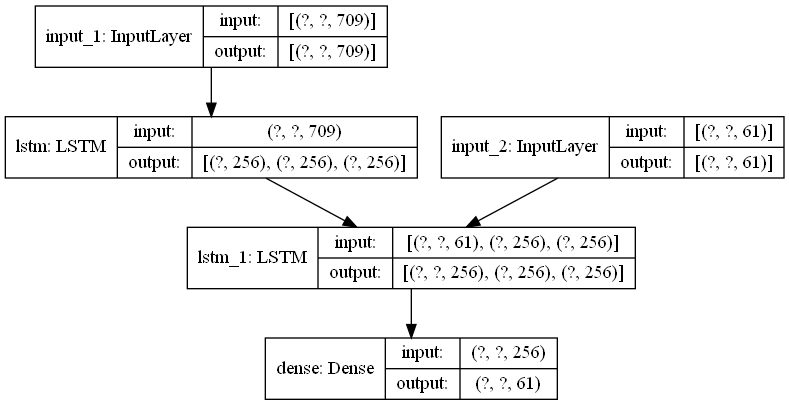

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [34]:
encoder_model= Model(inputs=encoder_inputs, outputs=encoder_states)

decoder_state_input_h= Input(shape=(256,))
decoder_state_input_c= Input(shape=(256,))
decoder_states_inputs= [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c= decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states= [state_h, state_c]
decoder_outputs= decoder_dense(decoder_outputs)
decoder_model= Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)

index_to_src= dict((i, char) for char, i in word_index_source.items())
index_to_tar= dict((i, char) for char, i in word_index_target.items())
# print(index_to_tar)

def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1, len(word_index_target)+1))
    target_seq[0, 0, word_index_target['\t']] = 1.
    stop_condition = False
    decoded_sentence = ""
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens)
        if (sampled_token_index == 0):
            sampled_token_index = 1
        sampled_char = index_to_tar[sampled_token_index]
        decoded_sentence += sampled_char
        if (sampled_char == '\n' or len(decoded_sentence) > max_tar_len):
            stop_condition = True
        target_seq = np.zeros((1, 1, len(word_index_target)+1))
        target_seq[0, 0, sampled_token_index] = 1.
        states_value = [h, c]
    return decoded_sentence


In [35]:
import numpy as np
for seq_index in range(500,511):
    input_seq = encoder_input[seq_index:seq_index+1]
    decoded_sentence = decode_sequence(input_seq)
    # print(input_seq)

    print(35 * "-")
    print('입력문장:', data.source[seq_index])
    print('정답문장:', data.target[seq_index][:len(data.target[seq_index])])
    # print('정답문장:', data.target[seq_index])
    print('번역기가번역한문장:', decoded_sentence[:len(decoded_sentence)-1])
# 1000개 문장, epoch 100번


-----------------------------------
입력문장: 나는 편도선염에 의한 고열로 병원에 갔어.
정답문장: I visited the hospital with high fever due to tonsillitis.
번역기가번역한문장: I think I will go to the firit to the sturseste.
-----------------------------------
입력문장: 나는 수학 여행을 1 박 2 일로 갔어.
정답문장: I went on a school excursion for one night and two days.
번역기가번역한문장: I went to the school with my friends to moke frich.
-----------------------------------
입력문장: 나도 어제 여기 마사지 샵을 갔어.
정답문장: I went that massage shop yesterday as well.
번역기가번역한문장: I went to the school to bet schouss by ar monsean.
-----------------------------------
입력문장: 돈도 벌고 여행도 하고 싶어서 갔어.
정답문장: I went there because I wanted to make money and travel.
번역기가번역한문장: I went to the school in the the school on Suturday?
-----------------------------------
입력문장: 나는 어제 여동생이랑 카페에 갔어.
정답문장: I went to a cafe with my sister yesterday.
번역기가번역한문장: I went to the stupitt it the studing to morn.
-----------------------------------
입력문장: 그의 사촌 여동생 남자 친구가 하는 레스토랑에 갔어.
정답문장: I went to 

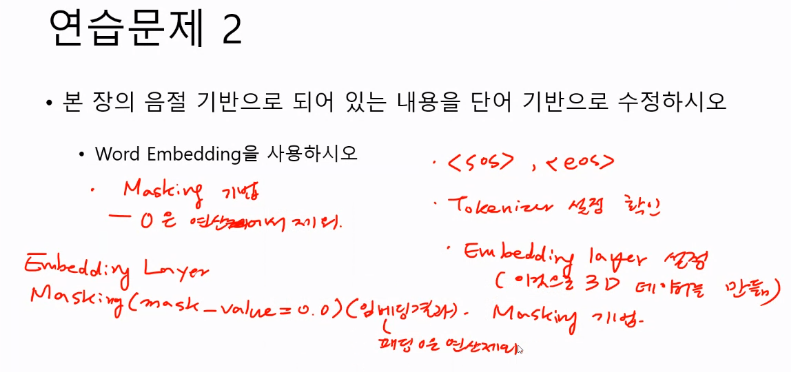